# FEniCS Practice #

### Test problem for the Poisson equation in 2D ###

Solving linear variational problem.


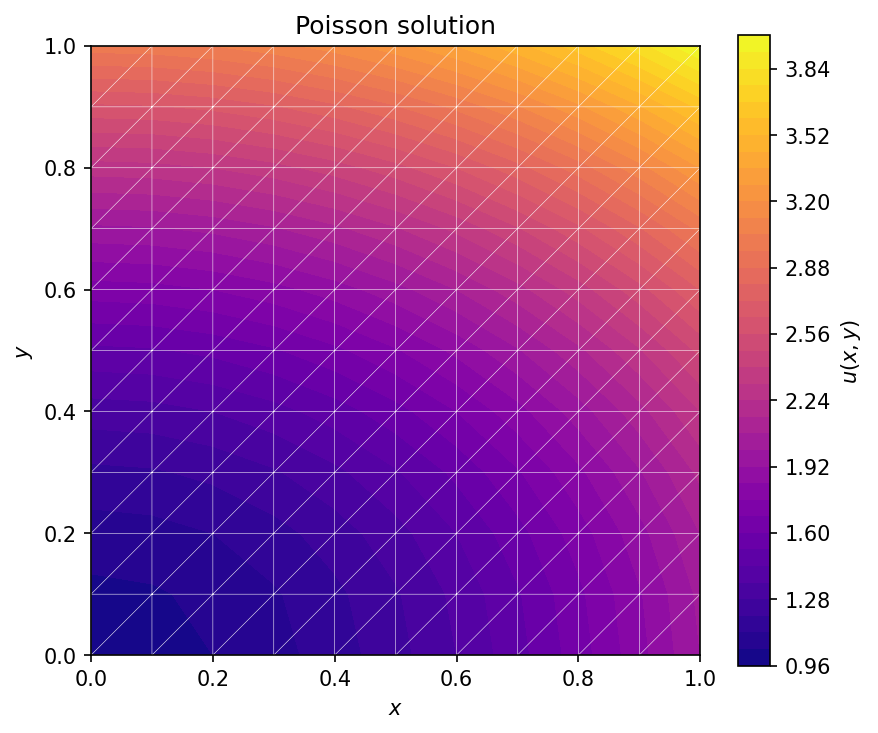

L2 error is 0.00527046276694924
Max error is 4.440892098500626e-15
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.


In [9]:
from fenics import*
import numpy as np
import matplotlib.pyplot as plt

# mesh and define function space
mesh = UnitSquareMesh(10,10)
V = FunctionSpace(mesh, 'Lagrange', 1) # 2nd argument specifies the element type, third argument specifies order

# dirichlet bc
u_D = Expression('1+x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# variational formulation
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# solution
u = Function(V)
solve( a == L, u, bc)

# plot
plt.figure(figsize=(6,5), dpi=150)

c = plot(u, cmap="plasma")
plot(mesh, color="white", linewidth=0.25)

plt.colorbar(c, label=r"$u(x,y)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Poisson solution")

plt.tight_layout()
plt.show()



# l2 error
error_l2 = errornorm(u_D, u, 'L2')

# max error at vertices
vertext_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertext_values_u_D - vertex_values_u))

print('L2 error is', error_l2)
print('Max error is', error_max)


In [1]:
import sys, site
print("python:", sys.executable)
print("prefix:", sys.prefix)
print("site-packages:", site.getsitepackages()[:1])


python: /opt/homebrew/Caskroom/miniforge/base/envs/fenics-legacy/bin/python
prefix: /opt/homebrew/Caskroom/miniforge/base/envs/fenics-legacy
site-packages: ['/opt/homebrew/Caskroom/miniforge/base/envs/fenics-legacy/lib/python3.10/site-packages']
